# Language Classification with Naive Bayes in Python

## Project Outline
[**Introduction**](#intro)

[**Task 1**](#task1): Exploratory Data Analysis + Visualization

[**Task 2**](#task2): Data Cleaning and Preprocessing

[**Task 3**](#task3): Naive Bayes Model Introduction and Training

[**Task 4**](#task4): Highlighting Problems with Basic Model and Simple Fixes

[**Task 5**](#task5): Advanced Approach to Further Improve Performance

In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from collections import defaultdict
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from helper_code import *

import joblib


<a id='intro'></a>
# Introduction

In [3]:
model = joblib.load('Data/Models/final_model.joblib')
vectorizer = joblib.load('Data/Vectorizers/final_model.joblib')

/home/nastiositi/disk_e/PycharmProjects/Flask_App/venv/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/nastiositi/disk_e/PycharmProjects/Flask_App/venv/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## [Slovak Wikipedia Entry](https://sk.wikipedia.org/wiki/Jazveč%C3%ADk)
Mnohí ľudia, ktorí vidia na ulici jazvečíka s podlhovastým telom vôbec nevedia o tom, že tento malý štvornohý a veľmi obľúbený spoločník je pri dobrom výcviku obratným, vynikajúcim a spoľahlivým poľovným psom. Ako poľovný pes je mnohostranne využiteľný, okrem iného ako durič na brlohárenie. Králičí jazvečík sa dokáže obratne pohybovať v králičej nore. S inými psami a deťmi si nie vždy rozumie.

## [Czech Wikipedia Entry](https://cs.wikipedia.org/wiki/Jezevč%C3%ADk)
Úplně první zmínky o psech podobných dnešním jezevčíkům nacházíme až ve Starém Egyptě, kde jsou vyobrazeni na soškách a rytinách krátkonozí psi s dlouhým hřbetem a krátkou srstí. Jednalo se ale o neustálený typ bez ustáleného jména. Další zmínky o jezevčících nacházíme až ve 14 - 15. století. Jedná se o psa, který se nejvíce podobá dnešnímu typu hladkosrstého standardního jezevčíka.


## [Polska Wikipedia Entry](https://pl.wikipedia.org/wiki/J%C4%99zyk_polski)
Język polski, polszczyzna – język z grupy zachodniosłowiańskiej (do której należą również czeski, słowacki i języki łużyckie), stanowiącej część rodziny indoeuropejskiej. Funkcjonuje jako język urzędowy Polski oraz należy do oficjalnych języków Unii Europejskiej. Ocenia się, że jest mową ojczystą ok. 44 mln ludzi na świecie.

## [Ukrainian Wikipedia Entry](https://uk.wikipedia.org/wiki/%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%81%D1%8C%D0%BA%D0%B0_%D0%BC%D0%BE%D0%B2%D0%B0)
Національна мова українців. Належить до слов'янської групи індоєвропейської мовної сім'ї. Є державною мовою в Україні.
Число мовців — близько 45 млн, більшість з яких проживає в Україні. Поширена також у Білорусі, Молдові, Польщі, Росії, Румунії, Словаччині, Казахстані, Аргентині, Бразилії, Великій Британії, Канаді, США та інших країнах, де мешкають українці. Українською мовою у світі послуговуються від 41 до 45 млн осіб, вона є другою чи третьою слов'янською мовою за кількістю мовців (після російської та, можливо, польської) та входить до третього десятка найпоширеніших мов світу.

In [9]:
text_sk = 'ahoj dievča, ako sa máš v nálade'
text_cs = 'ahoj holka, jak se máš v náladě'
text_ua = 'Привіт дівчино як у тебе настрій'
text_pl = 'cześć dziewczyno, jak się masz nastrój'
text = preprocess_function(text_sk)
text = [split_into_subwords(text)]
text_vectorized = vectorizer.transform(text)
model.predict(text_vectorized)

array(['sk'], dtype='<U2')

<a id='task1'></a>
# Task 1: Data Exploration and Visualization

In [4]:
def open_file(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
    return data

In [5]:
data_raw = dict()
data_raw['sk'] = open_file('Data/Sentences/train_sentences.sk')
data_raw['cs'] = open_file('Data/Sentences/train_sentences.cs')
data_raw['pl'] = open_file('Data/Sentences/train_sentences.pl')
data_raw['ua'] = open_file('Data/Sentences/train_sentences.ua')

In [9]:
def show_statistics(data):
    for language, sentences in data.items():

        number_of_sentences = len(sentences)
        word_list = ' '.join(sentences).split()
        number_of_words = len(word_list)
        number_of_unique_words = len(set(word_list))
        sample_extract = sentences[8]
        
        
        print(f'Language: {language}')
        print('-----------------------')
        print(f'Number of sentences\t:\t {number_of_sentences}')
        print(f'Number of words\t\t:\t {number_of_words}')
        print(f'Number of unique words\t:\t {number_of_unique_words}')
        print(f'Sample extract\t\t:\t {sample_extract}...\n')

In [10]:
show_statistics(data_raw)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 spravodajca. - Vážená pani predsedajúca, diskusia a výroky mojich kolegov ma ešte väčšmi utvrdili v presvedčení, že sú potrebné pravidlá, že sú potrebné silné požiadavky, ktoré by sa mohli stať povinnými, že je potrebná silná agentúra.
...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 V roce 2009 je to popáté, kdy byly z tohoto fondu uvolněny prostředky, přičemž byla využita celková částka 53 milionů EUR z plánované výše 500 milionů EUR.
...

Language: pl
-----------------------
Number of sentences	:	 31
Number of words		:	 1731
Number of unique words	:	 979
Sample extract		:	 W celu przeciwdziałania rozprzestrzenianiu się choroby zaleca się mycie rąk. CDC zaleca częste mycie rąk mydłem i wodą przez co najmniej dwadzieścia sekund, szczególnie po skorzystaniu z

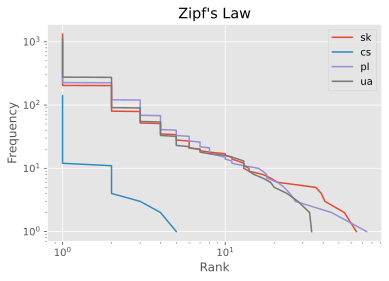

In [11]:
do_law_of_zipf(data_raw)

<a id='task2'></a>
# Task 2: Data Cleaning and Preprocessing

In [12]:
def preprocess(text):
    """
    Removes punctuation and digits from a string, and converts all characters to lowercase.
    Also clears all \n and hyphens (splits hyphenated words into two words).
    """
    preprocessed_text = text.lower().replace('–', ' ')
    
    translation_table = str.maketrans('\n', ' ', string.punctuation+string.digits+'“[]{}()\'"')
    
    preprocessed_text = preprocessed_text.translate(translation_table)
        
    return preprocessed_text

In [13]:
data_preprocessed = {k: [preprocess(sentence) for sentence in v] for k, v in data_raw.items()}

In [14]:
show_statistics(data_preprocessed)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 1995
Number of unique words	:	 1207
Sample extract		:	 spravodajca  vážená pani predsedajúca diskusia a výroky mojich kolegov ma ešte väčšmi utvrdili v presvedčení že sú potrebné pravidlá že sú potrebné silné požiadavky ktoré by sa mohli stať povinnými že je potrebná silná agentúra ...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 155
Number of unique words	:	 133
Sample extract		:	 v roce  je to popáté kdy byly z tohoto fondu uvolněny prostředky přičemž byla využita celková částka  milionů eur z plánované výše  milionů eur ...

Language: pl
-----------------------
Number of sentences	:	 31
Number of words		:	 1612
Number of unique words	:	 803
Sample extract		:	 w celu przeciwdziałania rozprzestrzenianiu się choroby zaleca się mycie rąk cdc zaleca częste mycie rąk mydłem i wodą przez co najmniej dwadzieścia sekund szczególnie po skorzystaniu z toalety lub gdy ręce 

<a id='task3'></a>
# Task 3: The Naive Bayes Model

**Bayes' Theorem**

\begin{equation}
P(A | B)=\frac{P(B | A) \times P(A)}{P(B)}
\end{equation}

Now, let's translate this theory into our specific problem. In our case, where we want to categorise a sentence `my name is Ari` into one of `sk`, `cs`, or `en`, the following are the probabilities we want to determine.

\begin{equation}
P(\text {sk} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {sk}) \times P(\text {sk})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {cs} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {cs}) \times P(\text {cs})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {ua} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {ua}) \times P(\text {ua})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {pl} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {pl}) \times P(\text {pl})}{P(\text {my name is Ari})}
\end{equation}

## Vectorizing Training Data

|Sentence   	||   my   	| is 	| I 	| love 	| name 	| it 	| Ari 	|
|-----------------	||:------:	|:--:	|:-:	|:----:	|:----:	|:--------:	|:---:	|
| my name is Ari  	||    1   	|  1 	| 0 	|   0  	|   1  	|     0    	|  1  	|
| I love it 	||    0   	|  0 	| 1 	|   1  	|   0  	|     1    	|  0  	|

In [15]:
sentences_train, y_train = [], []

for k, v in data_preprocessed.items():
    for sentence in v:
        sentences_train.append(sentence)
        y_train.append(k)

In [16]:
vectorizer = CountVectorizer()

In [17]:
X_train = vectorizer.fit_transform(sentences_train)

In [18]:
X_train

<211x3090 sparse matrix of type '<class 'numpy.int64'>'
	with 4623 stored elements in Compressed Sparse Row format>

## Initializing Model Parameters and Training

In [19]:
naive_classifier = MultinomialNB()
naive_classifier.fit(X_train, y_train)

MultinomialNB()

## Vectorizing Validation Data and Evaluating Model

In [20]:
data_val = dict()
data_val['sk'] = open_file('Data/Sentences/val_sentences.sk')
data_val['cs'] = open_file('Data/Sentences/val_sentences.cs')
data_val['ua'] = open_file('Data/Sentences/val_sentences.ua')
data_val['pl'] = open_file('Data/Sentences/val_sentences.pl')

data_val_preprocessed = {k: [preprocess(sentence) for sentence in v] for k, v in data_val.items()}

In [21]:
sentences_val, y_val = [], []

for k, v in data_val_preprocessed.items():
    for sentence in v:
        sentences_val.append(sentence)
        y_val.append(k)

In [22]:
X_val = vectorizer.transform(sentences_val)

In [23]:
predictions = naive_classifier.predict(X_val)

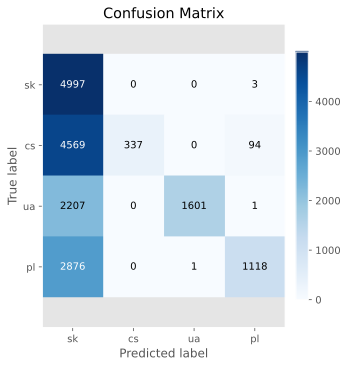

In [24]:
plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'ua', 'pl'])

In [25]:
f1_score(y_val, predictions, average='weighted')

0.4011908022489825

<a id='task4'></a>
# Task 4: Simple Adjustments and Highlighting Model Shortcomings

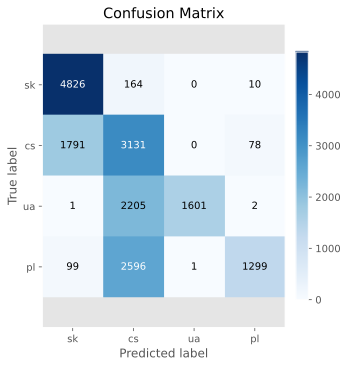

In [33]:
naive_classifier = MultinomialNB(alpha=0.001, fit_prior=False)
naive_classifier.fit(X_train, y_train)

predictions = naive_classifier.predict(X_val)

plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'ua', 'pl'])

In [34]:
f1_score(y_val, predictions, average='weighted')

0.6005034415017024

<a id='task5'></a>
# Task 5: Using Subwords to Shift Perspective

**Dummy Dataset**

playing ; eating ; play ; reads ; tea

**Step 1**

Break each word into characters

playing > p l a y i n g


**Step 2**

Find common character sequences

ea, ing, play

**Step 3**

Convert dataset using these subwords into

play ing ; ea t ing ; play ; r ea d s ; t ea

In [35]:
# taken from https://arxiv.org/abs/1508.07909

import re, collections
def get_stats(vocab):
    pairs = collections.defaultdict(int) 
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq 
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word] 
    return v_out

In [36]:
def get_vocab(data):

    words = []
    for sentence in data:
        words.extend(sentence.split())
        
    vocab = defaultdict(int)
    for word in words:
        vocab[' '.join(word)] += 1
        
    return vocab

In [37]:
vocab = get_vocab(sentences_train)

In [38]:
# also taken from original paper
for i in range(100):
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get) 
    vocab = merge_vocab(best, vocab)

In [39]:
merges = defaultdict(int)
for k, v in vocab.items():
    for subword in k.split():
        if len(subword) >= 2:
            merges[subword] += v

In [40]:
merge_ordered = sorted(merges, key=merges.get, reverse=True)

In [41]:
pkl.dump(merge_ordered, open('Data/Auxiliary/merge_ordered.pkl', 'wb'))

In [42]:
def split_into_subwords(text):
    merges = pkl.load(open('Data/Auxiliary/merge_ordered.pkl', 'rb'))
    subwords = []
    for word in text.split():
        for subword in merges:
            subword_count = word.count(subword)
            if subword_count > 0:
                word = word.replace(subword, ' ')
                subwords.extend([subword]*subword_count)
    return ' '.join(subwords)

In [43]:
split_into_subwords('this is ari here')

're'

In [44]:
data_preprocessed_subwords = {k: [split_into_subwords(sentence) for sentence in v] for k, v in data_preprocessed.items()}

In [45]:
show_statistics(data_preprocessed_subwords)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 3230
Number of unique words	:	 57
Sample extract		:	 pr od že ná ni pa pr da ia sk ro ch ko le ov ma te mi li pr ve že po re né pr že po re né si né po ia da to by sa li st po mi ný že je po re ná ná si ra...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 215
Number of unique words	:	 47
Sample extract		:	 ro ce je to po by to to ho ny vo ro st la by ko ce st ka li mi no né va li mi...

Language: pl
-----------------------
Number of sentences	:	 31
Number of words		:	 3124
Number of unique words	:	 54
Sample extract		:	 ce lu pr ni ia ła ci ze ro st pr ni ni ze ze si ch ro by za le si ie za le st cz ie od pr ze na ie ie ia wa ie cz po st ni ko zy to le ty lu ce ie ra wy ne za ru pr ze ie je ze ra po ch ni wa wy no sa ni ka ła lu ch ni to te la go po za lu ia ru st je za ny ja pr ze wy re po je od ro ie wa ze je go po ch ro ne za le po na to st ie wa so ro ka do de zy

In [46]:
data_train_subwords = []
for sentence in sentences_train:
    data_train_subwords.append(split_into_subwords(sentence))

In [47]:
data_val_subwords = []
for sentence in sentences_val:
    data_val_subwords.append(split_into_subwords(sentence))

In [48]:
vectorizer = CountVectorizer()

In [49]:
X_train = vectorizer.fit_transform(data_train_subwords)
X_val = vectorizer.transform(data_val_subwords)

In [56]:
naive_classifier = MultinomialNB(alpha=0.001, fit_prior=False)
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.001, fit_prior=False)

In [57]:
predictions = naive_classifier.predict(X_val)

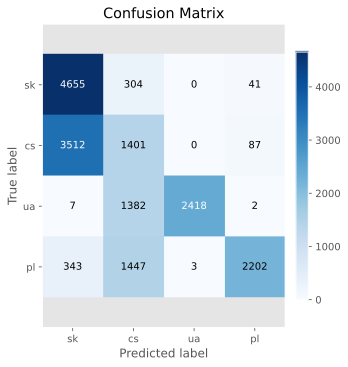

In [58]:
plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'ua', 'pl'])

In [59]:
f1_score(y_val, predictions, average='weighted')



0.5982240001065071